In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import geopandas as gpd
# import pandas as pd
import numpy as np
# from geopandas import GeoDataFrame
# from shapely.geometry import Point, LineString
import matplotlib
from openpyxl import load_workbook
from datetime import datetime
import matplotlib.patches as mpatches

In [6]:
Load = pd.read_excel('Data/Texas_load_2017/native_Load_2017.xlsx')
def convert_time(x):
    t = x.split(' ')
    t2 = t[1].split(':')
    t3 = int(t2[0])-1
    t = t[0] + ' ' + str(t3) + ':' + t2[1]
    return datetime.strptime(t, '%m/%d/%Y %H:%M')
Load['Time'] = Load['Hour Ending'].apply(convert_time)

In [7]:
Load.drop('Hour Ending', axis=1, inplace = True)
Load.set_index("Time", drop=True, inplace=True)
Load['Month'] = Load.index.month
# Load['Month'] = Load.Month.apply(lambda x: x.strftime('%H:%M'))

In [8]:
Gen = pd.read_excel('PV module modeling.xlsx', header=24)
Gen['Final'] = Gen.Final.apply(lambda x: x/1000)

In [9]:
Gen.index = Load.index
Gen['Month'] = Gen.index.month

In [27]:
Load2 = Load.copy()
Load2['FWEST'] = Load.FWEST.apply(lambda x: x*0.05*0.34)

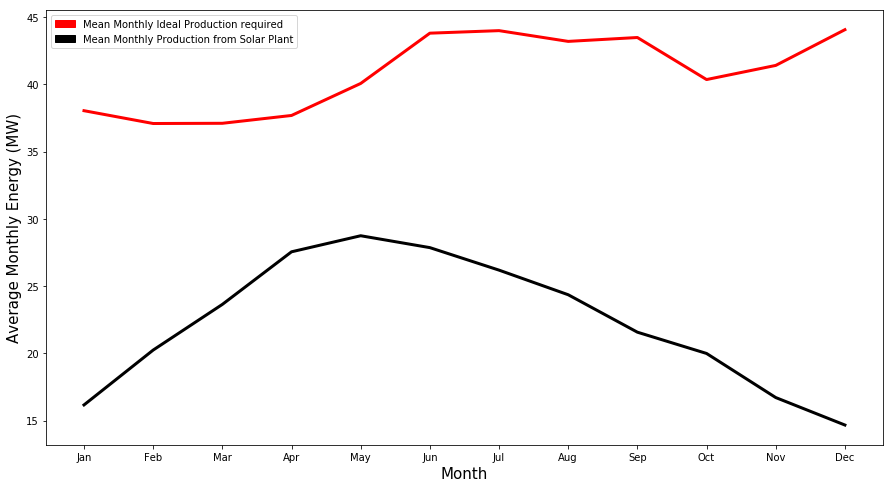

In [28]:
Monthly_L=Load2.groupby(['Month']).mean()
Monthly_G=Gen.groupby(['Month']).mean()
plt.figure(num=2, figsize=(15,8))
plt.plot(Monthly_L['FWEST'], color='r', alpha=1, linewidth='3')
plt.plot(Monthly_G['Final'], color='k', alpha=1, linewidth='3')
# plt.plot(Hourly['FWEST'].mean(),color='k', alpha=1, linewidth='4')
plt.ylabel('MONTH')
plt.ylabel('Average Monthly Energy (MW)', fontsize = 15)
plt.xticks(Monthly_L.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', "Dec"])
plt.xlabel('Month', fontsize = 15)
leg_L = mpatches.Patch(color='red', label='Mean Monthly Ideal Production required')
leg_G = mpatches.Patch(color='black', label='Mean Monthly Production from Solar Plant')
plt.legend(handles=[leg_L, leg_G])
plt.show()

In [30]:
Load['Hour'] = Load.index.hour
Load2['Hour'] = Load.index.hour
Gen['Hour'] = Gen.index.hour

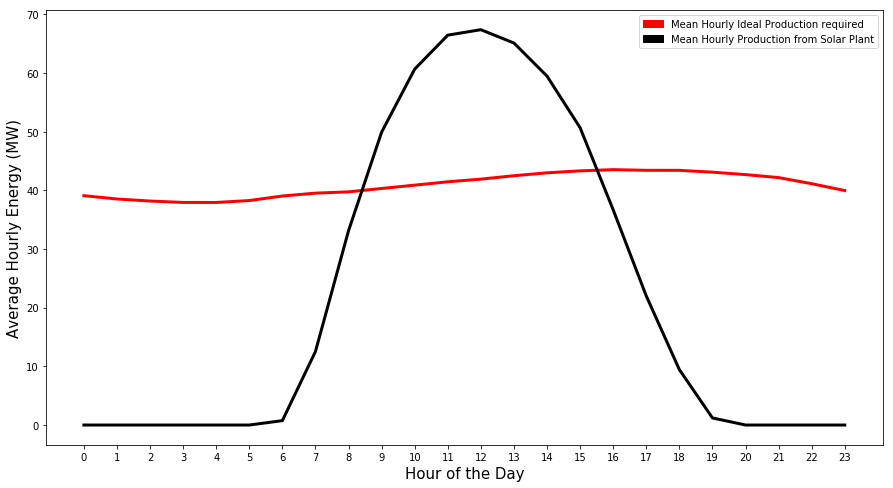

In [34]:
Hourly_L=Load2.groupby(['Hour']).mean()
Hourly_G=Gen.groupby(['Hour']).mean()
plt.figure(num=2, figsize=(15,8))
plt.plot(Hourly_L['FWEST'], color='r', alpha=1, linewidth='3')
plt.plot(Hourly_G['Final'],color='k', alpha=1, linewidth='3')
plt.ylabel('')
plt.ylabel('Average Hourly Energy (MW)', fontsize = 15)
plt.xticks(Hourly_L.index)
plt.xlabel('Hour of the Day', fontsize = 15)
leg_L = mpatches.Patch(color='red', label='Mean Hourly Ideal Production required')
leg_G = mpatches.Patch(color='black', label='Mean Hourly Production from Solar Plant')
plt.legend(handles=[leg_L, leg_G])
plt.show()

In [36]:
GHI = pd.read_csv('Data/Hourly GHI.csv')

In [37]:
GHI.index = Load.index

In [38]:
GHI['Hour'] = GHI.index.hour

In [39]:
degree_celcius =  u"\u2103"
degree = u'\xb0'
square = '\u00b2'

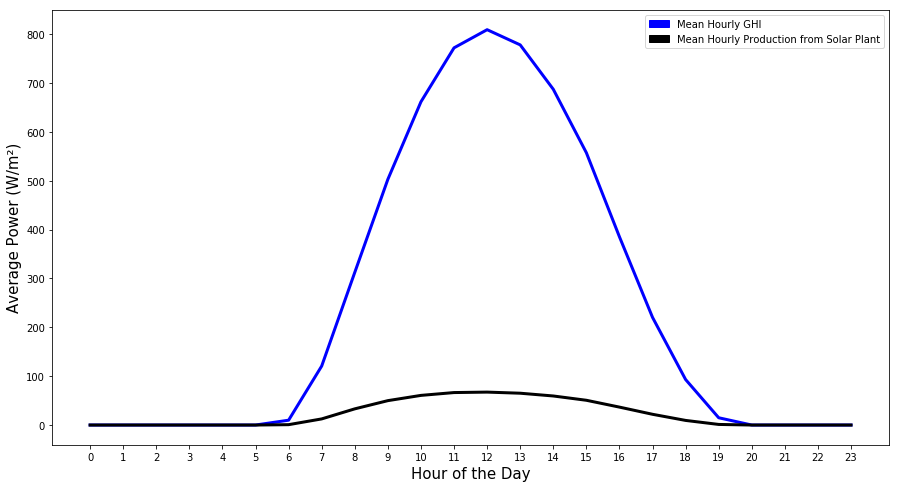

In [47]:
Hourly=GHI.groupby(['Hour']).mean()
Hourly
plt.figure(num=2, figsize=(15,8))
plt.plot(Hourly['GHI'], color='b', alpha=1, linewidth='3')
plt.plot(Hourly_G['Final'],color='k', alpha=1, linewidth='3')
# plt.ylabel('MONTH')
plt.ylabel('Average Power (W/m'+square+')', fontsize = 15)
plt.xticks(Hourly.index)
plt.xlabel('Hour of the Day', fontsize = 15)
leg_L = mpatches.Patch(color='Blue', label='Mean Hourly GHI')
leg_G = mpatches.Patch(color='black', label='Mean Hourly Production from Solar Plant')
plt.legend(handles=[leg_L, leg_G])
plt.show()

In [45]:
GHI['Month'] = GHI.index.month

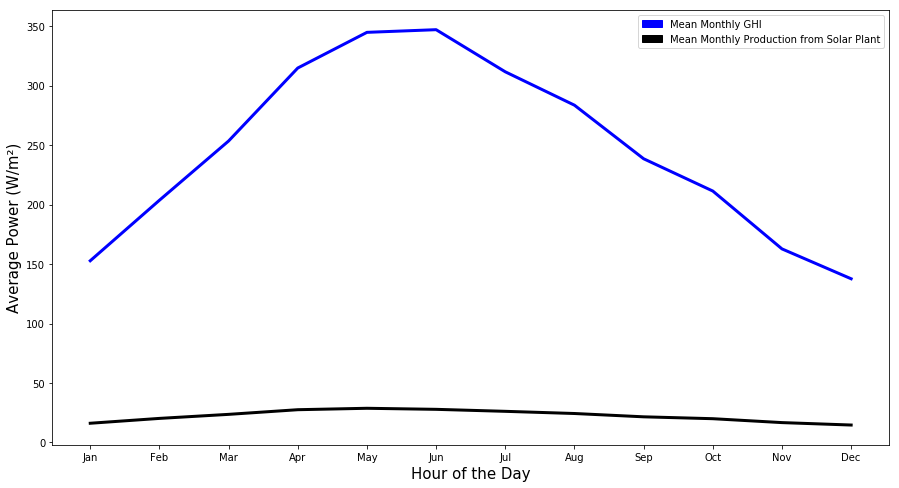

In [51]:
Monthly=GHI.groupby(['Month']).mean()
plt.figure(num=2, figsize=(15,8))
plt.plot(Monthly['GHI'], color='b', alpha=1, linewidth='3')
plt.plot(Monthly_G['Final'],color='k', alpha=1, linewidth='3')
# plt.ylabel('MONTH')
plt.ylabel('Average Power (W/m'+square+')', fontsize = 15)
plt.xticks(Monthly_L.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', "Dec"])
plt.xlabel('Hour of the Day', fontsize = 15)
leg_L = mpatches.Patch(color='Blue', label='Mean Monthly GHI')
leg_G = mpatches.Patch(color='black', label='Mean Monthly Production from Solar Plant')
plt.legend(handles=[leg_L, leg_G])
plt.show()